# 1. Preprocessing 

featreg and tsnr

# Import

In [18]:
# Nipype is a pipelining tool
# Nibabel is a library to read in nifti-files
# Matplotlib is a plotting library
# Seaborn is an extension to matplotlib, that offers convenience wrappers and less ugly plots
# Numpy is 'matlab for Python'
# Nypipe pipelining libraries


import nipype
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nipype.algorithms.misc import TSNR
from nipype.workflows.fmri.fsl import create_featreg_preproc
import nipype.pipeline.engine as pe
import nipype.pipeline as np
import nipype.interfaces.io as nio

%matplotlib inline


# Variables

In [19]:
TR = 2.5

In [20]:
subject_ids = ['001']

In [21]:
modalities = ['tactile'] #['visual'] 

# Specify workflow

In [22]:
# Create workflow
preproc_workflow = create_featreg_preproc()  #The default name is "featpreproc".

In [23]:
# Put the temprarory 'workflow-folder' on the big /data-disk!!
preproc_workflow.base_dir = '/home/ysalzer1/fMRI/amc_Tactile_Simon_Study/workflow_folders/'

In [24]:
# Set up smoothing and highpass filtering at 64 seconds
preproc_workflow.inputs.inputspec.fwhm = 5 #0.0
preproc_workflow.inputs.inputspec.highpass = True #64 / TR

# Connect Input

In [25]:
#set up a file-selector with a template
templates = {'func':'/home/ysalzer1/fMRI/amc_Tactile_Simon_Study/sub_{subject_id}/func/{modality}/*_Simontask_S1_WIP_fmri_epi_vibrotactile_SENSE_*_1.nii'}


In [26]:
selector = pe.Node(nio.SelectFiles(templates), name='selector')
selector.iterables = [('subject_id', subject_ids),('modality', modalities)]

In [27]:
#connect the selector to the input of the preprocessing workflow
preproc_workflow.connect(selector, 'func', preproc_workflow.get_node("inputspec"), 'func')

# Connect Output

In [28]:
#connect the output of the preprocessing workflow to the datasink
ds = pe.Node(nio.DataSink(), name='datasink')
ds.inputs.base_directory = '/home/ysalzer1/fMRI/amc_Tactile_Simon_Study/derivatives/preprocessed_data/'

In [29]:
preproc_workflow.connect(preproc_workflow.get_node("outputspec"), 'highpassed_files', ds, 'highpassed_files')
preproc_workflow.connect(preproc_workflow.get_node("outputspec"), 'mask', ds, 'mask')
preproc_workflow.connect(preproc_workflow.get_node("outputspec"), 'mean', ds, 'mean')
preproc_workflow.connect(preproc_workflow.get_node("outputspec"), 'motion_parameters', ds, 'motion_parameters')
preproc_workflow.connect(preproc_workflow.get_node("outputspec"), 'motion_plots', ds, 'motion_plots')
preproc_workflow.connect(preproc_workflow.get_node("outputspec"), 'realigned_files', ds, 'realigned_files')
preproc_workflow.connect(preproc_workflow.get_node("outputspec"), 'reference', ds, 'reference')
preproc_workflow.connect(preproc_workflow.get_node("outputspec"), 'smoothed_files', ds, 'smoothed_files')

# Specify nodes and connect

In [30]:
tsnr_node = pe.MapNode(TSNR(), iterfield=['in_file'], name='tsnr')


In [31]:
preproc_workflow.connect(preproc_workflow.get_node('outputspec'), 'realigned_files', tsnr_node, 'in_file')
preproc_workflow.connect(tsnr_node,  'tsnr_file', ds, 'tsnr')

# draw workflow image, and RUN

In [32]:
from IPython.display import Image
preproc_workflow.write_graph()

INFO:workflow:Converting dotfile: /home/ysalzer1/fMRI/amc_Tactile_Simon_Study/workflow_folders/featpreproc/graph.dot to png format


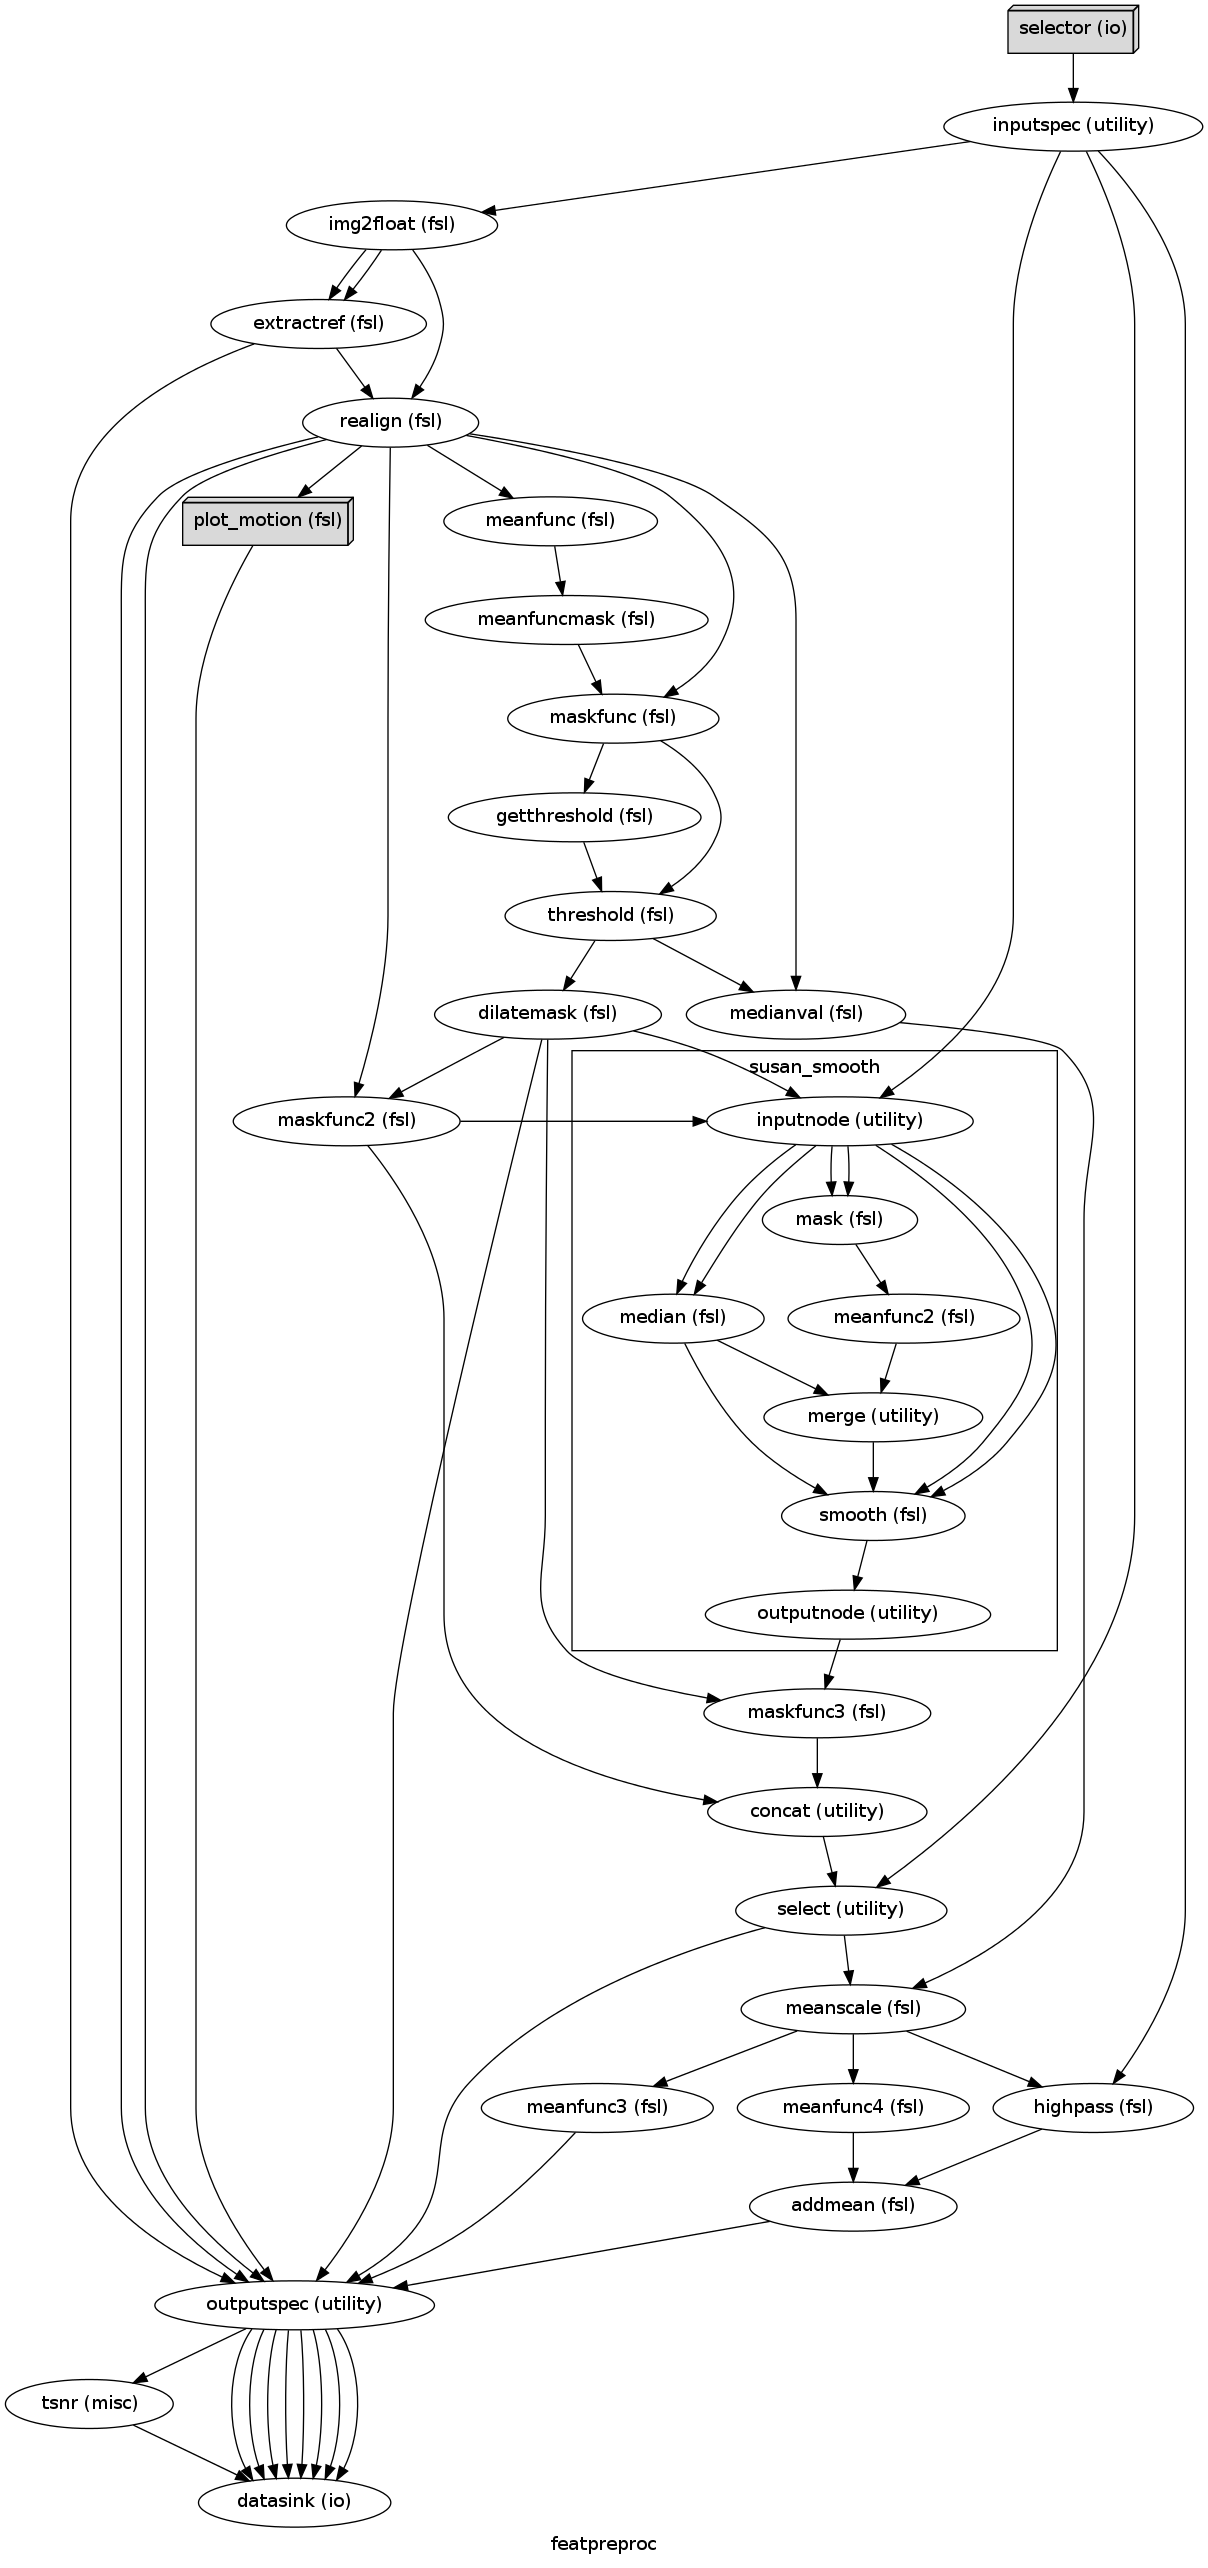

In [33]:
Image('/home/ysalzer1/fMRI/amc_Tactile_Simon_Study/workflow_folders/featpreproc/graph.dot.png')

In [ ]:
preproc_workflow.run(plugin='MultiProc', plugin_args={'n_procs' : 8})

INFO:workflow:['check', 'execution', 'logging']
INFO:workflow:Running in parallel.
INFO:workflow:Submitting 1 jobs
INFO:workflow:Executing: selector.bI.b0 ID: 0
INFO:workflow:[Job finished] jobname: selector.bI.b0 jobid: 0
INFO:workflow:Executing node selector.bI.b0 in dir: /home/ysalzer1/fMRI/amc_Tactile_Simon_Study/workflow_folders/featpreproc/_modality_tactile_subject_id_001/selector
INFO:workflow:Submitting 1 jobs
INFO:workflow:Adding 4 jobs for mapnode img2float.b0
INFO:workflow:Submitting 4 jobs
INFO:workflow:Executing: _img2float0 ID: 30
INFO:workflow:[Job finished] jobname: _img2float0 jobid: 30
INFO:workflow:Executing: _img2float1 ID: 31
INFO:workflow:[Job finished] jobname: _img2float1 jobid: 31
INFO:workflow:Executing: _img2float2 ID: 32
INFO:workflow:[Job finished] jobname: _img2float2 jobid: 32
INFO:workflow:Executing: _img2float3 ID: 33
INFO:workflow:[Job finished] jobname: _img2float3 jobid: 33
INFO:workflow:Submitting 1 jobs
INFO:workflow:Executing: img2float.b0 ID: 1
I